In [2]:
%%html
<link rel="stylesheet" href="static/hyrule.css" type="text/css">

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [6]:
#Billboard Dataset 1964-2015
df = pd.read_csv('data/processed.csv')
df.shape

(5100, 26)

In [10]:
#Subset of MillionSongDatabase
df_2 = pd.read_csv('data/MSDprocessed_ALL.csv')
df_2.shape

(10000, 24)

In [11]:
df_2.columns
df_2.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
df_2.columns

Index([u'Year', u'Song', u'Artist', u'acousticness', u'analysis_url',
       u'danceability', u'duration_ms', u'energy', u'id', u'instrumentalness',
       u'key', u'liveness', u'loudness', u'mode', u'speechiness', u'tempo',
       u'time_signature', u'track_href', u'type', u'uri', u'valence',
       u'Popularity'],
      dtype='object')

In [13]:
df.columns

Index([u'Unnamed: 0', u'Rank', u'Song', u'Artist', u'Year', u'Lyrics',
       u'Source', u'acousticness', u'analysis_url', u'danceability',
       u'duration_ms', u'energy', u'id', u'instrumentalness', u'key',
       u'liveness', u'loudness', u'mode', u'speechiness', u'tempo',
       u'time_signature', u'track_href', u'type', u'uri', u'valence',
       u'Popularity'],
      dtype='object')

In [17]:
df.drop(['Unnamed: 0'], axis=1)

,Rank,Song,Artist,Year,Lyrics,Source,acousticness,analysis_url,danceability,duration_ms,...,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence,Popularity
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0,0.713000,https://api.spotify.com/v1/audio-analysis/2Xku...,0.582,140867.0,...,-11.890,1.0,0.0529,140.601,4.0,https://api.spotify.com/v1/tracks/2XkuSbp5say8...,audio_features,spotify:track:2XkuSbp5say8nZW8g6156Z,0.5590,49.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0,0.204000,https://api.spotify.com/v1/audio-analysis/3aSW...,0.686,163680.0,...,-4.809,1.0,0.0287,126.736,4.0,https://api.spotify.com/v1/tracks/3aSWQJcWnnqg...,audio_features,spotify:track:3aSWQJcWnnqgwYbAgidvlV,0.9650,62.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0,0.034800,https://api.spotify.com/v1/audio-analysis/2PzU...,0.725,222813.0,...,-7.842,1.0,0.0353,136.282,4.0,https://api.spotify.com/v1/tracks/2PzU4IB8Dr6m...,audio_features,spotify:track:2PzU4IB8Dr6mxV3lHuaG34,0.8970,68.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0,0.485000,https://api.spotify.com/v1/audio-analysis/36ck...,0.510,155960.0,...,-8.105,0.0,0.0500,143.381,4.0,https://api.spotify.com/v1/tracks/36ckFm0oicmv...,audio_features,spotify:track:36ckFm0oicmvX8bWEErIHd,0.6830,33.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0,0.504000,https://api.spotify.com/v1/audio-analysis/5GMw...,0.390,225227.0,...,-14.120,1.0,0.0265,94.444,4.0,https://api.spotify.com/v1/tracks/5GMw6X6BbCDG...,audio_features,spotify:track:5GMw6X6BbCDGO9gApQYRSa,0.4520,55.0
5,6,downtown,petula clark,1965,when youre alone and life is making you lonel...,1.0,0.091600,https://api.spotify.com/v1/audio-analysis/5pfJ...,0.828,292593.0,...,-4.402,1.0,0.0694,109.725,4.0,https://api.spotify.com/v1/tracks/5pfJsMwoRYKa...,audio_features,spotify:track:5pfJsMwoRYKampPay8amX0,0.7240,73.0
6,7,help,the beatles,1965,help i need somebody help not just anybody hel...,3.0,0.001070,https://api.spotify.com/v1/audio-analysis/2arL...,0.507,215291.0,...,-4.684,1.0,0.0701,92.006,4.0,https://api.spotify.com/v1/tracks/2arL1Kf2JBS7...,audio_features,spotify:track:2arL1Kf2JBS7ms00JAz4w0,0.2750,71.0
7,8,cant you hear my heart beat,hermans hermits,1965,carterlewis every time i see you lookin my way...,5.0,0.104000,https://api.spotify.com/v1/audio-analysis/36zg...,0.585,137707.0,...,-8.170,1.0,0.0287,137.384,4.0,https://api.spotify.com/v1/tracks/36zgr1j3rnGv...,audio_features,spotify:track:36zgr1j3rnGvVrAjwTCqBV,0.8300,0.0
8,9,crying in the chapel,elvis presley,1965,you saw me crying in the chapel the tears i s...,1.0,0.948000,https://api.spotify.com/v1/audio-analysis/2inb...,0.255,145400.0,...,-16.236,1.0,0.0363,70.536,4.0,https://api.spotify.com/v1/tracks/2inb1KNU2bGI...,audio_features,spotify:track:2inb1KNU2bGIkldLsuDb83,0.1640,43.0
9,10,my girl,the temptations,1965,ive got sunshine on a cloudy day when its cold...,3.0,0.035300,https://api.spotify.com/v1/audio-analysis/6p5G...,0.652,197640.0,...,-7.251,1.0,0.0330,94.969,4.0,https://api.spotify.com/v1/tracks/6p5GuyEqQH5p...,audio_features,spotify:track:6p5GuyEqQH5pv02ouEyogQ,0.2540,78.0


In [19]:
merged_df = pd.concat([df, df_2])
merged_df.shape

(15100, 26)

In [37]:
#Check for Duplicates; 15100 -> 14086
names = pd.concat(g for _, g in merged_df.groupby('Song') if len(g) > 1)
names.isnull().sum()

index = names['Rank'].index[names['Rank'].apply(np.isnan)]
merged_df = merged_df.drop(merged_df.index[index])
merged_df.shape

(13801, 26)

In [39]:
def topTen(row):
    if np.isnan(row['Rank']):
        ret=0
    else:
        ret=1
    return ret
merged_df['BB_Dummy'] = merged_df.apply(topTen, axis=1)
merged_df.columns

Index([u'Artist', u'Lyrics', u'Popularity', u'Rank', u'Song', u'Source',
       u'Unnamed: 0', u'Year', u'acousticness', u'analysis_url',
       u'danceability', u'duration_ms', u'energy', u'id', u'instrumentalness',
       u'key', u'liveness', u'loudness', u'mode', u'speechiness', u'tempo',
       u'time_signature', u'track_href', u'type', u'uri', u'valence',
       u'BB_Dummy'],
      dtype='object')

In [41]:
#Build model off selected audio features to start
features_df = merged_df[['Song', 'Artist', 'BB_Dummy', 'acousticness', 'danceability',
'energy', 'instrumentalness', 'liveness', 'mode', 'tempo', 'valence', 'Popularity', 'speechiness']]
features_df.shape

(13801, 13)

In [43]:
features_df.isnull().sum()

Song                   0
Artist                 0
BB_Dummy               0
acousticness        2708
danceability        2718
energy              2708
instrumentalness    2708
liveness            2709
mode                2708
tempo               2708
valence             2719
Popularity          2634
speechiness         2718
dtype: int64

In [45]:
features_df = features_df.dropna()
features_df.shape

(11082, 13)

,BB_Dummy,acousticness,danceability,energy,instrumentalness,liveness,mode,tempo,valence,Popularity,speechiness
count,11082.000000,11082.000000,11082.000000,11082.000000,11082.000000,11082.000000,11082.000000,11082.000000,11082.000000,11082.000000,11082.000000
mean,0.398845,0.303875,0.577409,0.612219,0.125155,0.204380,0.693286,119.820456,0.547550,29.928082,0.086924
std,0.489683,0.317179,0.174549,0.235235,0.276460,0.183405,0.461150,29.274699,0.259056,26.169385,0.111795
min,0.000000,0.000001,0.055500,0.000020,0.000000,0.011700,0.000000,38.081000,0.000010,0.000000,0.022700
25%,0.000000,0.028100,0.465000,0.450000,0.000000,0.092200,0.000000,97.146500,0.342000,4.000000,0.034300
50%,0.000000,0.169000,0.593000,0.641000,0.000039,0.129000,1.000000,118.163500,0.563000,24.000000,0.046500
75%,1.000000,0.547000,0.705000,0.801750,0.018700,0.260000,1.000000,137.048000,0.767000,54.000000,0.082400
max,1.000000,0.996000,0.988000,0.999000,0.992000,0.997000,1.000000,245.941000,0.992000,95.000000,0.956000


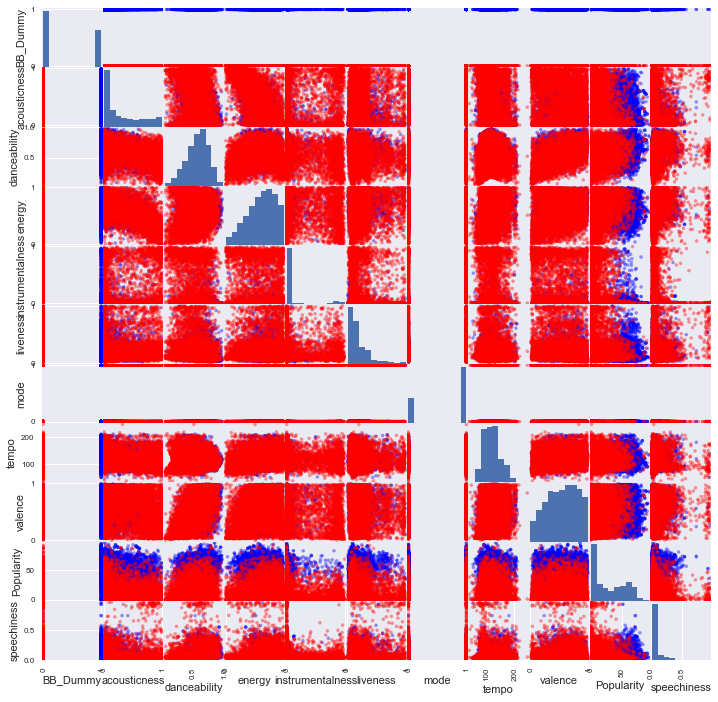

In [47]:
#pd.scatter_matrix(features_df, figsize=[12, 12], alpha=0.2, diagonal='kde')
#Red is songs without rank...
color_map = {
    0 : 'r',
    1 : 'b',
}
colors = [color_map[s] for s in features_df['BB_Dummy']]
pd.plotting.scatter_matrix(features_df, color=colors, figsize=(12,12), alpha=0.4)
features_df.describe()

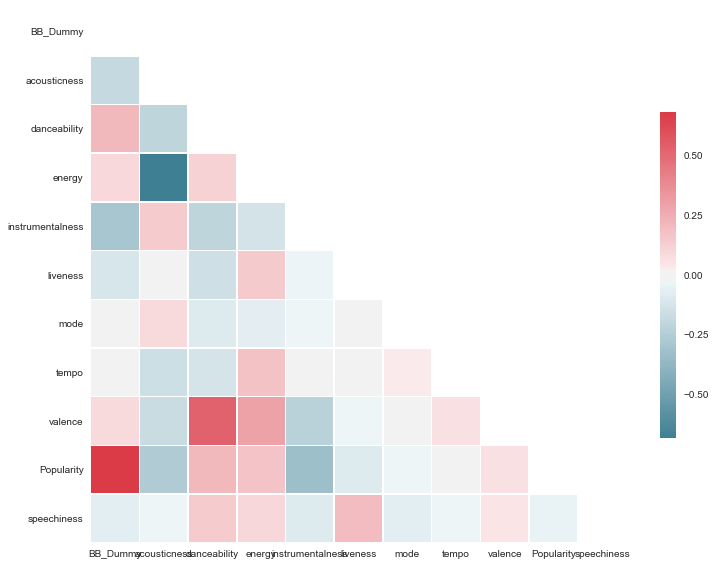

In [49]:
#See how features are correlated with diagnol correlation matrix
corr = features_df.corr()
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 12))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

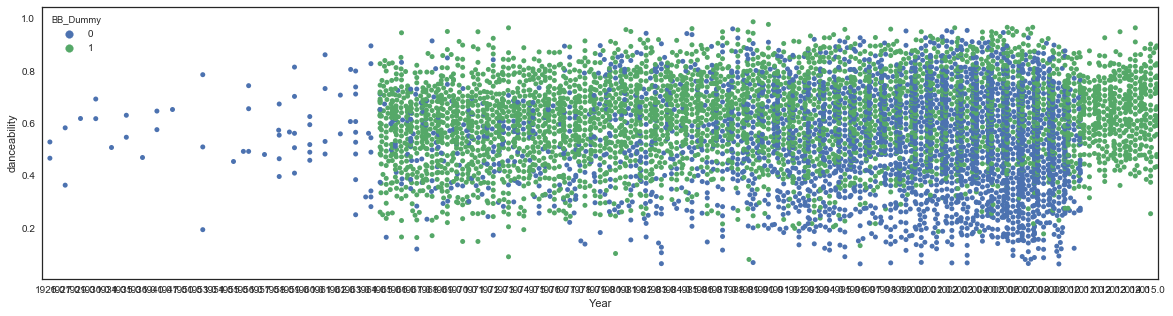

In [52]:
fig, ax = plt.subplots()

fig.set_size_inches(20, 5)
ndf = merged_df[['Song', 'Artist', 'BB_Dummy', 'acousticness', 'danceability',
'energy', 'instrumentalness', 'liveness', 'mode', 'tempo', 'valence', 'Popularity', 'Year']]
sns.swarmplot(x="Year", y="danceability", data=ndf, hue='BB_Dummy', ax=ax)

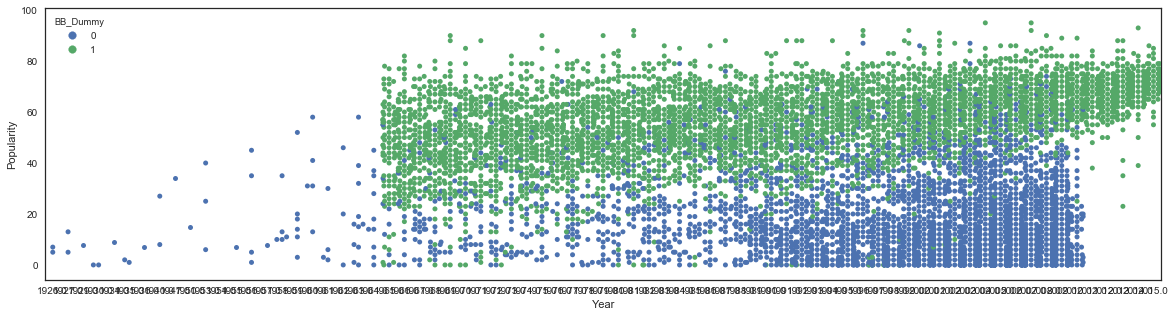

In [53]:
fig, ax = plt.subplots()

fig.set_size_inches(20, 5)
ndf = merged_df[['Song', 'Artist', 'BB_Dummy', 'acousticness', 'danceability',
'energy', 'instrumentalness', 'liveness', 'mode', 'tempo', 'valence', 'Popularity', 'Year']]
sns.swarmplot(x="Year", y="Popularity", data=ndf, hue='BB_Dummy', ax=ax)

In [58]:
#Try a random forest
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(random_state=1, max_depth=2)
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn import metrics

/Users/Oakes/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [60]:
numdf = features_df.drop(['Song', 'Artist'], axis=1)
train, test = train_test_split(numdf, test_size=0.3, random_state=1)
train = pd.DataFrame(data=train, columns=numdf.columns)
test = pd.DataFrame(data=test, columns=numdf.columns)
feature_df = train.drop('BB_Dummy', axis=1)
response = train['BB_Dummy']

In [62]:
rforest.fit(feature_df, response)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [64]:
features = train.columns.tolist()[1:]

In [66]:
rforest.feature_importances_

array([  4.95859199e-02,   1.04369971e-01,   6.57140803e-02,
         2.94862887e-01,   2.03656234e-03,   0.00000000e+00,
         2.13465059e-04,   0.00000000e+00,   4.79887341e-01,
         3.32977374e-03])

In [68]:
pd.DataFrame(zip(features, rforest.feature_importances_)).sort_index(by=1, ascending=False)

/Users/Oakes/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


,0,1
8,Popularity,0.479887
3,instrumentalness,0.294863
1,danceability,0.104370
2,energy,0.065714
0,acousticness,0.049586
9,speechiness,0.003330
4,liveness,0.002037
6,tempo,0.000213
5,mode,0.000000
7,valence,0.000000


In [70]:
rforest_preds = rforest.predict(test.drop('BB_Dummy', axis=1))

In [73]:
metrics.accuracy_score(test['BB_Dummy'], rforest_preds)

0.89864661654135336

In [75]:
#Confusion Matrix
pd.crosstab(test['BB_Dummy'], rforest_preds, rownames=['actual'], colnames=['rforest_predicted'])

rforest_predicted,0,1
actual,,
0,1807,162
1,175,1181


In [77]:
rforest_probs = rforest.predict_proba(test.drop('BB_Dummy', axis=1))[:,1]

In [79]:
metrics.roc_auc_score(test['BB_Dummy'], rforest_probs)

0.93397719969258008

In [82]:
y=numdf['BB_Dummy'].values
X=numdf[['acousticness', 'danceability',
'energy', 'instrumentalness', 'liveness', 'mode', 'tempo', 'valence', 'Popularity', 'speechiness']]

In [86]:
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
rforest = RandomForestClassifier(random_state=1, min_samples_leaf=20)
depth_range = range(1,20)
param_grid = dict(max_depth=depth_range)
rforest_grid = GridSearchCV(rforest, param_grid, cv=5, scoring='roc_auc')
rforest_grid.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=20,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [87]:
rforest_grid_mean_scores = [result[1] for result in rforest_grid.grid_scores_]

/Users/Oakes/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Oakes/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/Oakes/anaconda2/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


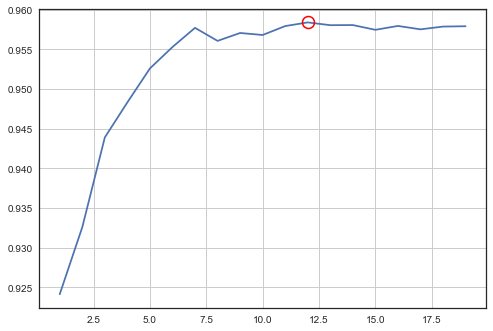

In [88]:
plt.figure()
plt.plot(depth_range, rforest_grid_mean_scores)
plt.hold(True)
plt.grid(True)
plt.plot(rforest_grid.best_params_['max_depth'], rforest_grid.best_score_, 'ro', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')

In [118]:
best = rforest_grid.best_estimator_

In [91]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(rforest_grid.best_estimator_, X, y, cv=5, scoring='accuracy')

In [93]:
scores

array([ 0.85205232,  0.91294542,  0.91064982,  0.93095668,  0.93592058])

In [95]:
np.mean(scores) 

0.90850496410246395

In [97]:
#Try a log regression model
from sklearn.linear_model import LogisticRegression

In [98]:
lrm = LogisticRegression()

In [100]:
numdf = features_df.drop(['Song', 'Artist'], axis=1)
train, test = train_test_split(numdf, test_size=0.3, random_state=1)
train = pd.DataFrame(data=train, columns=numdf.columns)
test = pd.DataFrame(data=test, columns=numdf.columns)
feature_df = train.drop('BB_Dummy', axis=1)
response = train['BB_Dummy']

In [104]:
lrm.fit(feature_df, response)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [105]:
lrm_preds = lrm.predict(test.drop('BB_Dummy', axis=1))

In [107]:
metrics.accuracy_score(test['BB_Dummy'], lrm_preds)

0.91428571428571426

In [109]:
lrm_probs = lrm.predict_proba(test.drop('BB_Dummy', axis=1))[:,1]

In [111]:
metrics.roc_auc_score(test['BB_Dummy'], lrm_probs)

0.96342516228683228

In [131]:
bb2016 = pd.read_csv('data/BB2016_processed.csv')
bb2016.shape
bb2016 = bb2016.dropna()

bb2016.iloc[69]

Unnamed: 0                                                         70
Unnamed: 0.1                                                       70
Rank                                                               71
Song                                                            SORRY
Artist                                                        Beyonce
acousticness                                                    0.942
analysis_url        https://api.spotify.com/v1/audio-analysis/4k8K...
danceability                                                    0.536
duration_ms                                                    179435
energy                                                           0.11
id                                             4k8Kq3yLE7I7umYfN08YCU
instrumentalness                                              0.00106
key                                                                11
liveness                                                          0.1
loudness            

In [125]:
X=bb2016[['acousticness', 'danceability',
'energy', 'instrumentalness', 'liveness', 'mode', 'tempo', 'valence', 'Popularity', 'speechiness']]

In [132]:
preds = pd.DataFrame(best.predict(X))
for i in preds:
    if i == 0:
        print(i)

0


In [134]:
msd_df = pd.read_csv('data/MSD_processed_Final.csv', encoding='utf-8')


(10000, 25)